# N8N Workflows Analysis

This notebook reads and analyzes the N8N_Workflows.csv file containing various AI automation workflows.

## 1. Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load the CSV File

In [6]:
# Read the CSV file
try:
    df = pd.read_csv('N8N_Workflows.csv')
    print("✅ File loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"📝 Number of workflows: {len(df)}")
except FileNotFoundError:
    print("❌ File 'N8N_Workflows.csv' not found. Please ensure it's in the same directory as this notebook.")
except Exception as e:
    print(f"❌ Error loading file: {e}")

✅ File loaded successfully!
📊 Dataset shape: (207, 8)
📝 Number of workflows: 207


## 3. Basic Data Exploration

In [11]:
# Display first few rows
print("\n📋 First 5 rows of the dataset:")
display(df.head())


📋 First 5 rows of the dataset:


,Title,Description,Date,Link,Setup Support,FINAL SCORE,Origin,Author
0,Browser AI Agent,AI agent uses Airtop and n8n to autonomously n...,2025/07/17,https://www.skool.com/ai-automation-society/ne...,NaN,4,Skool,Nate Herk
1,AI Marketing Team,Single AI agent in n8n creates complete market...,2025/07/17,https://www.skool.com/ai-automation-society/ne...,NaN,4,Skool,Nate Herk
2,AI SEO Content Automation,"Takes category, target audience, and specific ...",2025/07/17,https://www.reddit.com/r/n8n/comments/1l81jzd/...,NaN,4,Reddit,dudeson55
3,AI Agent Builder,Meta-AI agent in n8n creates custom AI agent w...,2025/07/17,https://www.skool.com/ai-automation-society/ne...,NaN,5,Skool,Nate Herk
4,AI Email Assistant,AI agent in n8n automatically identifies custo...,2025/07/17,https://www.skool.com/ai-automation-society/ne...,NaN,4,Skool,Nate Herk


In [13]:
# Display dataset information
print("\n📈 Dataset Info:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\n📝 Column names and data types:")
print(df.dtypes)


📈 Dataset Info:
Number of rows: 207
Number of columns: 8

📝 Column names and data types:
Title            object
Description      object
Date             object
Link             object
Setup Support    object
FINAL SCORE       int64
Origin           object
Author           object
dtype: object


In [15]:
# Data types and missing values
print("\n🔍 Data Types and Missing Values:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
display(df_info)


🔍 Data Types and Missing Values:


,Data Type,Non-Null Count,Null Count,Null Percentage
Title,object,207,0,0.00
Description,object,207,0,0.00
Date,object,207,0,0.00
Link,object,207,0,0.00
Setup Support,object,115,92,44.44
FINAL SCORE,int64,207,0,0.00
Origin,object,207,0,0.00
Author,object,207,0,0.00


## 4. Format Date Column to YYYY-MM-DD

In [18]:
# Format Date column to YYYY-MM-DD
print("\n📅 Formatting Date column...")
print("Before formatting:")
print(df['Date'].head())

# Convert to datetime and format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.strftime('%Y-%m-%d')

print("\nAfter formatting:")
print(df['Date'].head())

# Check for any failed conversions
failed_conversions = df['Date'].isna().sum()
if failed_conversions > 0:
    print(f"\n⚠️  Warning: {failed_conversions} dates could not be converted and were set to NaT")
else:
    print("\n✅ All dates converted successfully!")


📅 Formatting Date column...
Before formatting:
0    2025/07/17
1    2025/07/17
2    2025/07/17
3    2025/07/17
4    2025/07/17
Name: Date, dtype: object

After formatting:
0    2025-07-17
1    2025-07-17
2    2025-07-17
3    2025-07-17
4    2025-07-17
Name: Date, dtype: object

✅ All dates converted successfully!


## 5. Statistical Summary

In [21]:
# Statistical summary for numerical columns
print("\n📊 Statistical Summary (Numerical Columns):")
display(df.describe())


📊 Statistical Summary (Numerical Columns):


,FINAL SCORE
count,207.000000
mean,4.019324
std,0.472150
min,3.000000
25%,4.000000
50%,4.000000
75%,4.000000
max,5.000000


In [23]:
# Summary for categorical columns
print("\n📊 Summary for Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n📌 {col}:")
    print(f"   Unique values: {df[col].nunique()}")
    if df[col].nunique() <= 15:  # Only show value counts if not too many unique values
        print(f"   Top values:")
        print(df[col].value_counts().head(10))


📊 Summary for Categorical Columns:

📌 Title:
   Unique values: 202

📌 Description:
   Unique values: 207

📌 Date:
   Unique values: 20

📌 Link:
   Unique values: 206

📌 Setup Support:
   Unique values: 115

📌 Origin:
   Unique values: 7
   Top values:
Origin
Skool          111
Reddit          36
Gumroad         36
GitHub          10
Circle           6
Youtube          6
Sabrina.dev      2
Name: count, dtype: int64

📌 Author:
   Unique values: 39


## 6. Data Visualization


📈 Distribution of FINAL SCORE:


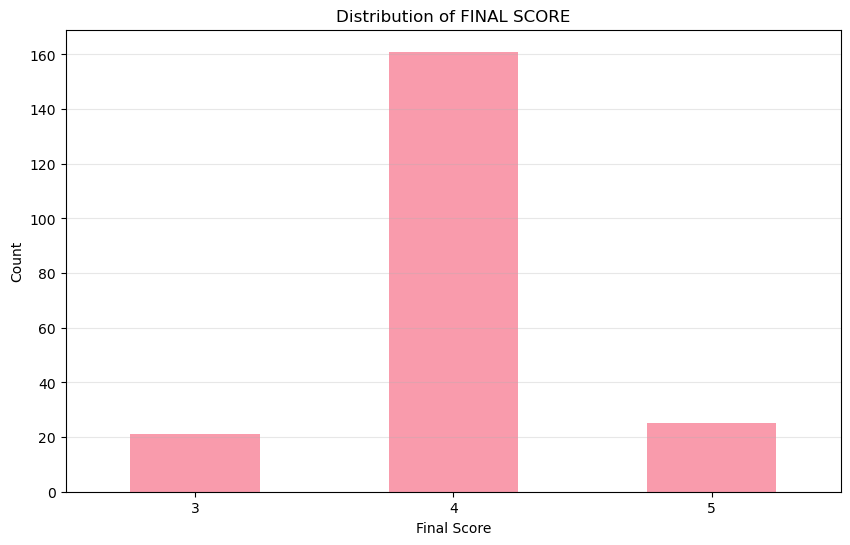

Average FINAL SCORE: 4.02
Highest FINAL SCORE: 5
Lowest FINAL SCORE: 3


In [26]:
# Distribution of FINAL SCORE
print("\n📈 Distribution of FINAL SCORE:")
plt.figure(figsize=(10, 6))
df['FINAL SCORE'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
plt.title('Distribution of FINAL SCORE')
plt.xlabel('Final Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"Average FINAL SCORE: {df['FINAL SCORE'].mean():.2f}")
print(f"Highest FINAL SCORE: {df['FINAL SCORE'].max()}")
print(f"Lowest FINAL SCORE: {df['FINAL SCORE'].min()}")


📊 Workflows by Origin:


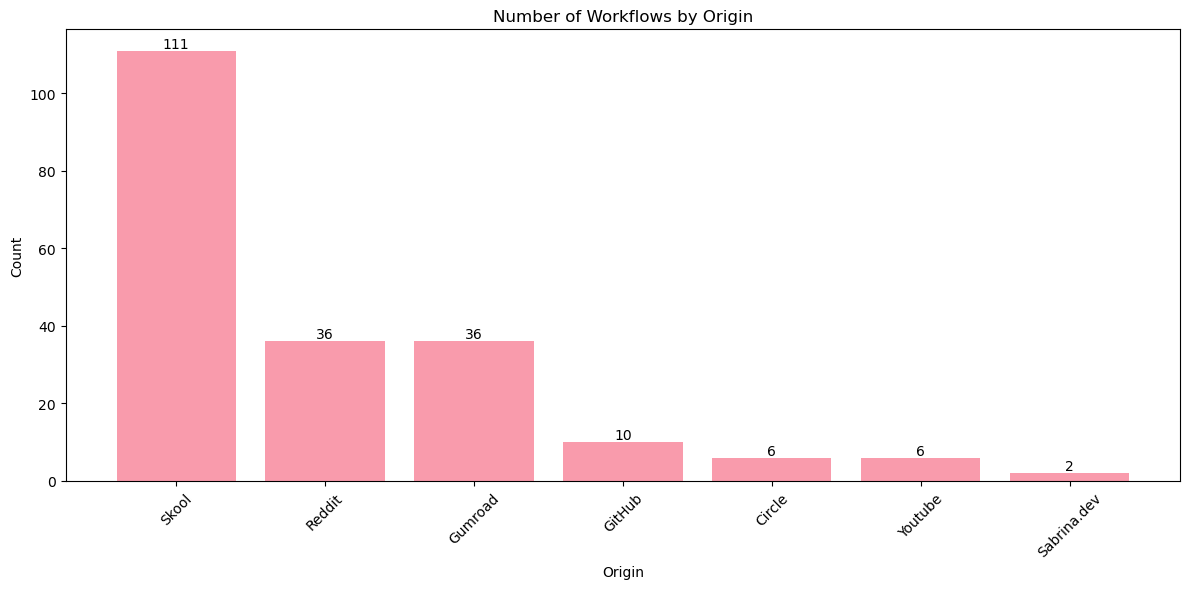

In [28]:
# Distribution by Origin
print("\n📊 Workflows by Origin:")
plt.figure(figsize=(12, 6))
origin_counts = df['Origin'].value_counts()
bars = plt.bar(range(len(origin_counts)), origin_counts.values, alpha=0.7)
plt.title('Number of Workflows by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.xticks(range(len(origin_counts)), origin_counts.index, rotation=45)

# Add value labels on bars
for bar, count in zip(bars, origin_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


👥 Top Authors by Number of Workflows:


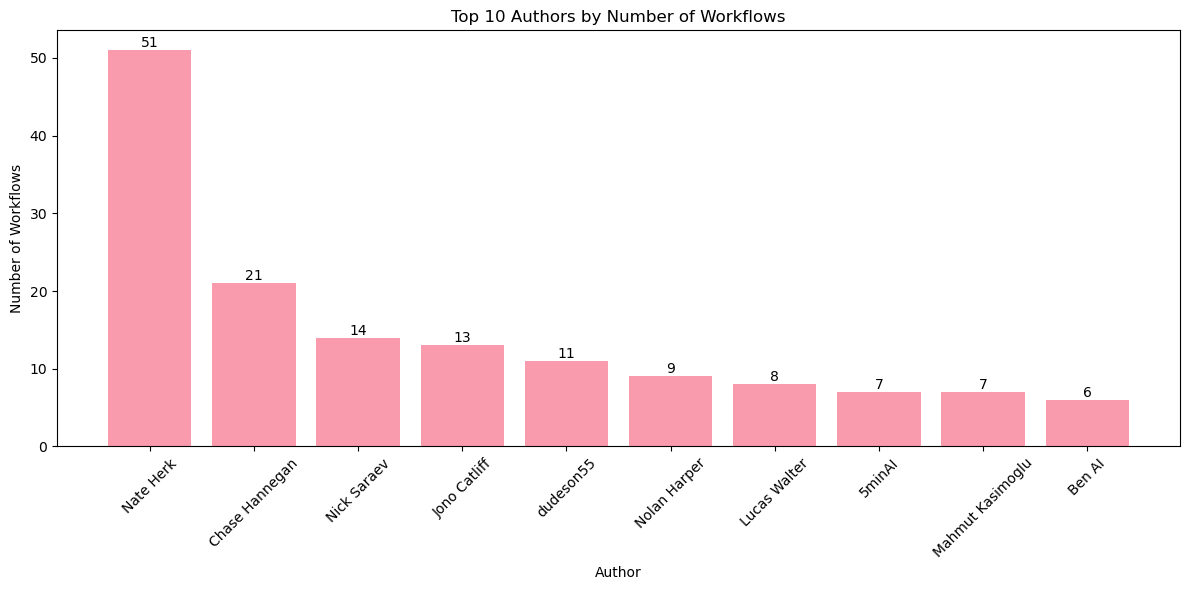

In [30]:
# Top Authors
print("\n👥 Top Authors by Number of Workflows:")
top_authors = df['Author'].value_counts().head(10)
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_authors)), top_authors.values, alpha=0.7)
plt.title('Top 10 Authors by Number of Workflows')
plt.xlabel('Author')
plt.ylabel('Number of Workflows')
plt.xticks(range(len(top_authors)), top_authors.index, rotation=45)

# Add value labels on bars
for bar, count in zip(bars, top_authors.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


📊 Average FINAL SCORE by Origin:


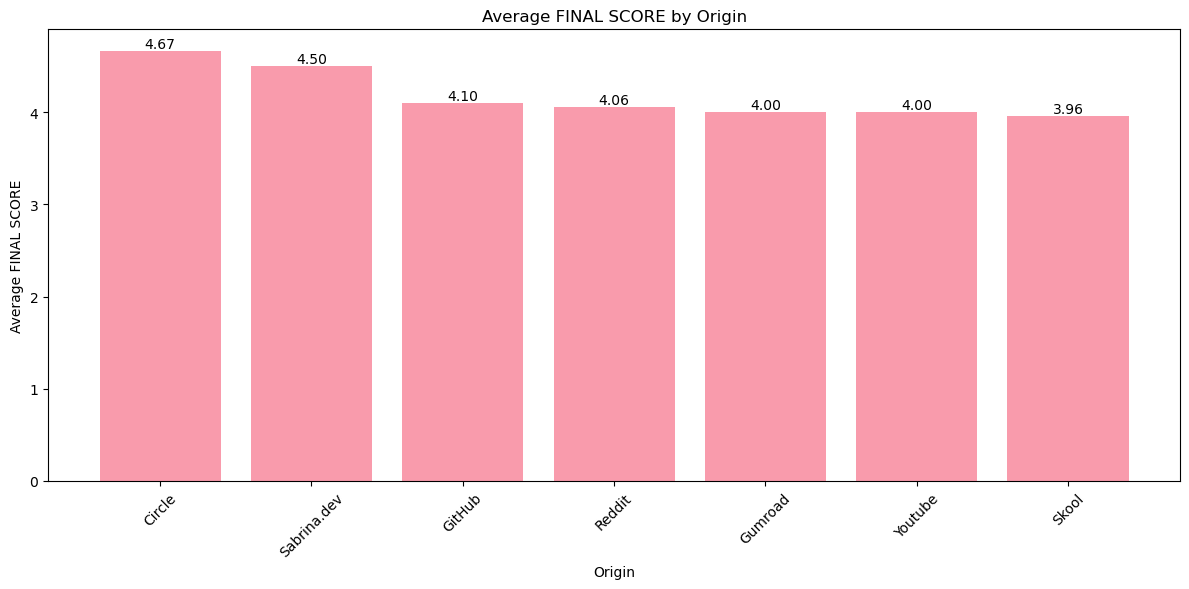

In [32]:
# Average Score by Origin
print("\n📊 Average FINAL SCORE by Origin:")
avg_score_by_origin = df.groupby('Origin')['FINAL SCORE'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(avg_score_by_origin)), avg_score_by_origin.values, alpha=0.7)
plt.title('Average FINAL SCORE by Origin')
plt.xlabel('Origin')
plt.ylabel('Average FINAL SCORE')
plt.xticks(range(len(avg_score_by_origin)), avg_score_by_origin.index, rotation=45)

# Add value labels on bars
for bar, score in zip(bars, avg_score_by_origin.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
## 7. Text Analysis - Workflow Categories


🔍 Analyzing Workflow Categories from Titles:


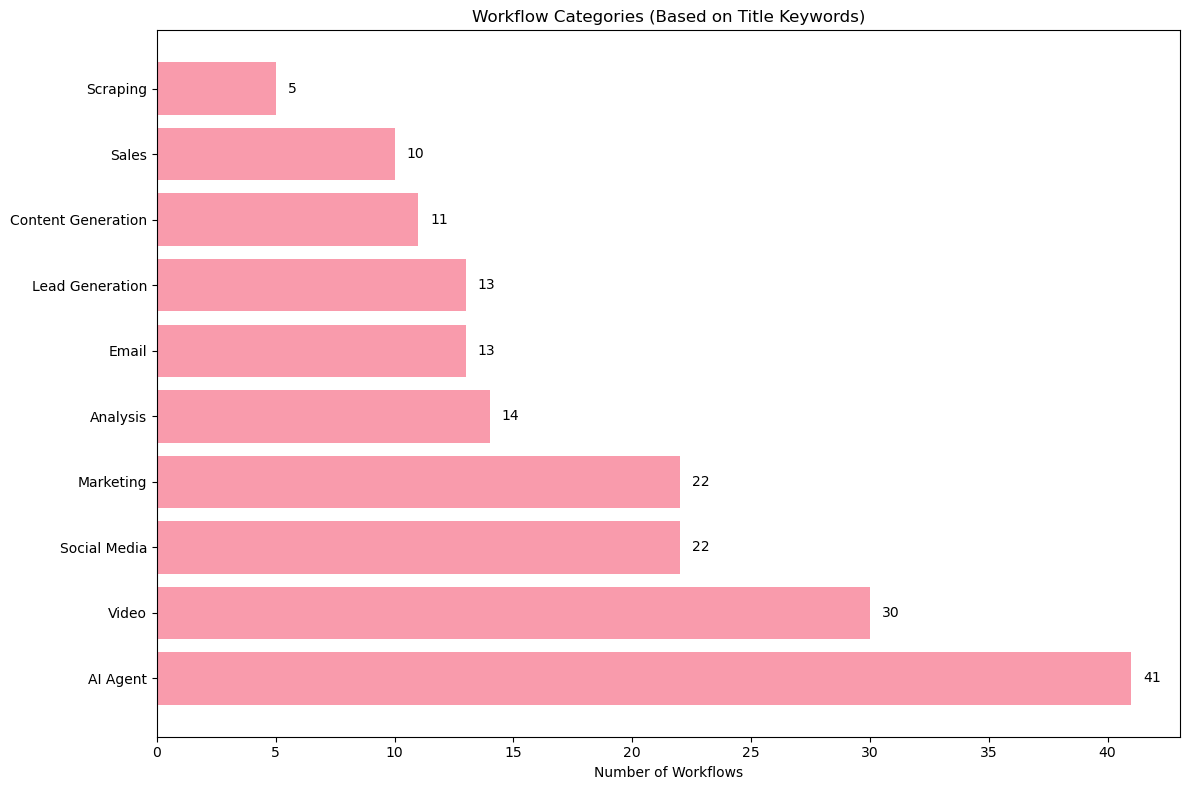

In [35]:
# Extract common categories from titles
print("\n🔍 Analyzing Workflow Categories from Titles:")

# Common AI/automation categories
categories = {
    'AI Agent': ['ai agent', 'agent', 'assistant'],
    'Content Generation': ['content', 'generate', 'writer', 'creator'],
    'Social Media': ['social', 'twitter', 'linkedin', 'instagram', 'tiktok', 'facebook'],
    'Video': ['video', 'reel', 'shorts', 'youtube', 'tiktok'],
    'Email': ['email', 'gmail', 'outlook'],
    'Scraping': ['scrape', 'scraper', 'crawl'],
    'Lead Generation': ['lead', 'prospect', 'outreach'],
    'Sales': ['sales', 'cold', 'crm'],
    'Marketing': ['marketing', 'ad', 'campaign'],
    'Analysis': ['analyze', 'analysis', 'insight', 'report']
}

# Count occurrences of each category
category_counts = {}
for category, keywords in categories.items():
    count = 0
    for title in df['Title'].str.lower():
        if any(keyword in title for keyword in keywords):
            count += 1
    category_counts[category] = count

# Plot category distribution
plt.figure(figsize=(12, 8))
sorted_categories = dict(sorted(category_counts.items(), key=lambda x: x[1], reverse=True))
bars = plt.barh(range(len(sorted_categories)), list(sorted_categories.values()), alpha=0.7)
plt.title('Workflow Categories (Based on Title Keywords)')
plt.xlabel('Number of Workflows')
plt.yticks(range(len(sorted_categories)), list(sorted_categories.keys()))

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, sorted_categories.values())):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            str(count), ha='left', va='center')

plt.tight_layout()
plt.show()

## 8. Data Quality Check

In [38]:
# Check for duplicates
print("\n🔍 Data Quality Check:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Check for empty strings
empty_strings = (df.applymap(lambda x: x == '')).sum().sum()
print(f"Number of empty strings: {empty_strings}")

# Check for whitespace-only strings
whitespace_only = (df.applymap(lambda x: isinstance(x, str) and x.strip() == '')).sum().sum()
print(f"Number of whitespace-only strings: {whitespace_only}")

# Check Setup Support column
setup_support_stats = df['Setup Support'].value_counts(dropna=False)
print(f"\n📞 Setup Support distribution:")
print(setup_support_stats)


🔍 Data Quality Check:
Number of duplicate rows: 0
Number of empty strings: 0
Number of whitespace-only strings: 0

📞 Setup Support distribution:
Setup Support
NaN                                            92
https://www.youtube.com/watch?v=Ah-1-Lda4DU     1
https://www.youtube.com/watch?v=GmlQZ8MG7HY     1
https://www.youtube.com/watch?v=iNjFF4RzoVg     1
https://www.youtube.com/watch?v=nQbd56j_dZ0     1
                                               ..
https://www.youtube.com/watch?v=gXKzEt1ZG38     1
https://www.youtube.com/watch?v=i08K-l8pjfs     1
https://www.youtube.com/watch?v=qZkX_gIlwsY     1
https://www.youtube.com/watch?v=_igpx9vXYvA     1
https://www.youtube.com/watch?v=tjaD65OCoE8     1
Name: count, Length: 116, dtype: int64


## 9. Top Rated Workflows

In [41]:
# Show top rated workflows
print("\n🏆 Top Rated Workflows (FINAL SCORE = 5):")
top_workflows = df[df['FINAL SCORE'] == 5][['Title', 'Author', 'Origin', 'Date']]
display(top_workflows)


🏆 Top Rated Workflows (FINAL SCORE = 5):


,Title,Author,Origin,Date
3,AI Agent Builder,Nate Herk,Skool,2025-07-17
11,AI Marketing Agent,dudeson55,Reddit,2025-07-18
12,AI Viral Video Scriptwriter,dudeson55,Reddit,2025-07-18
37,AI Newsletter Generator,dudeson55,Reddit,2025-07-21
49,AI Appointment Reminder,Frank Nillard,Skool,2025-07-22
51,AI Sales Agent,Chase Hannegan,Skool,2025-07-22
54,Cold Outreach Machine,Chase Hannegan,Skool,2025-07-22
55,RAG Chat System,Chase Hannegan,Skool,2025-07-22
70,RAG Voice Frontend,Chase Hannegan,Skool,2025-07-23
71,AI Agent Voice Website,Chase Hannegan,Skool,2025-07-23


In [43]:
# Show most recent workflows
print("\n🆕 Most Recent Workflows:")
recent_workflows = df.sort_values('Date', ascending=False).head(10)[['Title', 'Author', 'Origin', 'Date', 'FINAL SCORE']]
display(recent_workflows)


🆕 Most Recent Workflows:


,Title,Author,Origin,Date,FINAL SCORE
206,Automated Lead Gen System,dudeson55,Reddit,2025-09-20,4
205,AI Competitor Ad Cloning,dudeson55,Reddit,2025-09-15,4
204,AI Telegram Productivity Assistant,jiteshdugar,Reddit,2025-09-15,4
203,AI Virtual Try-On Integration,Odd-Pension-5078,Reddit,2025-09-14,4
202,Automated Twitter Reply Bot,max1302,Reddit,2025-09-13,4
201,AI UGC Ad Generator,LargePay1357,Reddit,2025-09-01,4
200,AI Workflow Generator,mrcsvlk,Reddit,2025-08-31,5
199,AI-Powered Workflow Builder,Weak_Birthday2735,Reddit,2025-08-29,4
198,Personalized News Digest,ekaa_,Reddit,2025-08-28,4
197,Calorie Tracker from Image,Odd-Pension-5078,Reddit,2025-08-28,3


## 10. Export Cleaned Data (Optional)

In [46]:
# Option to save cleaned data
save_cleaned = input("\n💾 Do you want to save a cleaned version of the data? (y/n): ")

if save_cleaned.lower() == 'y':
    # Create cleaned dataframe
    cleaned_df = df.copy()
    
    # Remove completely empty columns if any
    cleaned_df = cleaned_df.dropna(axis=1, how='all')
    
    # Save to new CSV
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'N8N_Workflows_cleaned_{timestamp}.csv'
    cleaned_df.to_csv(filename, index=False)
    print(f"✅ Cleaned data saved as: {filename}")
    
    # Also save top workflows separately
    top_workflows_filename = f'N8N_Top_Workflows_{timestamp}.csv'
    df[df['FINAL SCORE'] >= 4][['Title', 'Description', 'Author', 'Origin', 'FINAL SCORE', 'Date', 'Link']].to_csv(top_workflows_filename, index=False)
    print(f"✅ Top workflows (score >=4) saved as: {top_workflows_filename}")
else:
    print("❌ Data export cancelled.")


💾 Do you want to save a cleaned version of the data? (y/n):  y


✅ Cleaned data saved as: N8N_Workflows_cleaned_20251016_151416.csv
✅ Top workflows (score >=4) saved as: N8N_Top_Workflows_20251016_151416.csv


## 11. Summary Statistics

In [48]:
print("\n" + "="*60)
print("📋 N8N WORKFLOWS ANALYSIS SUMMARY")
print("="*60)
print(f"📊 Total Workflows: {df.shape[0]:,}")
print(f"📝 Total Columns: {df.shape[1]}")
print(f"⭐ Average FINAL SCORE: {df['FINAL SCORE'].mean():.2f}/5")
print(f"🏆 Top Rated Workflows (5/5): {(df['FINAL SCORE'] == 5).sum()}")
print(f"👥 Unique Authors: {df['Author'].nunique()}")
print(f"🌐 Platforms: {', '.join(df['Origin'].unique())}")
print(f"📅 Date Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"⚠️  Missing Values: {df.isnull().sum().sum()}")
print(f"🔍 Duplicate Rows: {df.duplicated().sum()}")
print("="*60)

# Top 3 authors
top_authors_summary = df['Author'].value_counts().head(3)
print("\n👑 Top 3 Most Prolific Authors:")
for author, count in top_authors_summary.items():
    print(f"   {author}: {count} workflows")

# Platform distribution
print("\n🌐 Workflow Distribution by Platform:")
for origin, count in df['Origin'].value_counts().items():
    percentage = (count / len(df) * 100)
    print(f"   {origin}: {count} workflows ({percentage:.1f}%)")


📋 N8N WORKFLOWS ANALYSIS SUMMARY
📊 Total Workflows: 207
📝 Total Columns: 8
⭐ Average FINAL SCORE: 4.02/5
🏆 Top Rated Workflows (5/5): 25
👥 Unique Authors: 39
🌐 Platforms: Skool, Reddit, Gumroad, Circle, Youtube, GitHub, Sabrina.dev
📅 Date Range: 2025-07-17 to 2025-09-20
⚠️  Missing Values: 92
🔍 Duplicate Rows: 0

👑 Top 3 Most Prolific Authors:
   Nate Herk: 51 workflows
   Chase Hannegan: 21 workflows
   Nick Saraev: 14 workflows

🌐 Workflow Distribution by Platform:
   Skool: 111 workflows (53.6%)
   Reddit: 36 workflows (17.4%)
   Gumroad: 36 workflows (17.4%)
   GitHub: 10 workflows (4.8%)
   Circle: 6 workflows (2.9%)
   Youtube: 6 workflows (2.9%)
   Sabrina.dev: 2 workflows (1.0%)
